# Scientific modules and IPython

Nikolay Koldunov


koldunovn@gmail.com

This is part of [**Python for Geosciences**](https://github.com/koldunovn/python_for_geosciences) notes.

================

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

## Core scientific packages

When people say that they do their scientific computations in Python it's only half true. Python is a construction set, similar to MITgcm or other models. Without packages it's only a core, that although very powerful, does not seems to be able to do much by itself.

There is a set of packages, that almost every scientist would need:

<img  height="200" src="files/core.png">

We are going to talk about all exept Sympy

##Installation

Installing python and all necessary packages considered being a hard task in the past. However with introduction of [conda](http://conda.pydata.org/), even complete beginner now can install all necessary packages without a lot of hassle. It works more or less similarly for all major systems (Windows, Mac, Linux). 

Here are the instructions that will set you up for the rest of the notes.

- First download [miniconda](http://conda.pydata.org/miniconda.html) and follow the instructions for your system to install it.

- Install necessary packages by executing the following command:

    
    conda install scipy matplotlib ipython-notebook pandas netcdf4 basemap 
    
    
- There is one more package that we have to install with a bit more special command:


    conda install -c http://conda.anaconda.org/ioos iris
    

If everything worked fine - you are ready to follow examples in this notebook series.

### For ZMAW users

In order to use latest version of python on zmaw computers one has to load appropriate module:

    module load python/2.7-ve2

### Ubuntu

It is strongly recomended to use conda, but if you whant to stick to your Linux repositories, the following command should set you up on Ubuntu or other Debian-based distributions:

    sudo apt-get install ipython-notebook python-matplotlib python-scipy python-pandas python-sympy python-mpltoolkits.basemap netcdf-bin cdo
    
However packages like iris and netcdf4 will not work.


## IPython and pylab

In order to be productive you need comfortable environment, and this is what IPython provide. It was started as enhanced python interactive shell, but with time become architecture for interactive computing.

Starting IPython with *--pylab* option loads some necessary modules (NumPy for data array support and Matplotlib for plotting support), that make it similar to Matlab console. However now this considered to be bad practice, espetially for begginers, since it's not always clear where things that we use came from. For the rest of the series we are going to use IPython without `--pylab` option.


### IPython notebook 

Since the 0.12 release, IPython provides a new rich text web interface - IPython notebook. Here you can combine:

#### Code execution

In [2]:
print('I love Python')

I love Python


#### Text (Markdown)

IPython [website](http://ipython.org/).

List:

* [Python on Codeacademy](http://www.codecademy.com/tracks/python)
* [Google's Python Class](https://developers.google.com/edu/python/)

Code:

    print('hello world')


#### $\LaTeX$ equations

$$\int_0^\infty e^{-x^2} dx=\frac{\sqrt{\pi}}{2}$$
$$
F(x,y)=0 ~~\mbox{and}~~
\left| \begin{array}{ccc}
  F''_{xx} & F''_{xy} &  F'_x \\
  F''_{yx} & F''_{yy} &  F'_y \\
  F'_x     & F'_y     & 0 
  \end{array}\right| = 0
$$

#### Plots

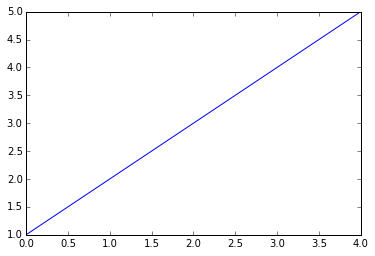

In [3]:
x = [1,2,3,4,5]
plt.plot(x);

#### Rich media

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('F4rFuIb1Ie4')

* [IPython website](http://ipython.org/)
* [Notebook gallery](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks) 

## Run notebook

In order to start IPython notebook you have to type:

    ipython notebook


### You can download and run this lectures:

Web version can be accesed from the [github repository](https://github.com/koldunovn/python_for_geosciences).

You can download them as .zip file:

    wget https://github.com/koldunovn/python_for_geosciences/archive/master.zip

Unzip:
    
    unzip master.zip

And run:

    cd python_for_geosciences-master/
    ipython notebook

## Main IPyhton features

### Getting help

You can use question mark in order to get help. To execute cell you have to press *Shift+Enter*

In [1]:
?

Question mark after a function will open pager with documentation. Double question mark will show you source code of the function. 

In [8]:
plt.plot??

Press TAB after opening bracket in order to get help for the function (list of arguments, doc string).

In [ ]:
sum(

### Accessing the underlying operating system

You can access system functions by typing exclamation mark.

In [5]:
!pwd

/Users/koldunov/PYTHON/test/python_for_geosciences


If you already have some netCDF file in the directory and *ncdump* is installed, you can for example look at its header.

In [8]:
!ncdump -h test_netcdf.nc

netcdf test_netcdf {
dimensions:
	TIME = 1464 ;
	LATITUDE = 73 ;
	LONGITUDE = 144 ;
variables:
	float TIME(TIME) ;
		TIME:units = "hours since 1-1-1 00:00:0.0" ;
	float LATITUDE(LATITUDE) ;
	float LONGITUDE(LONGITUDE) ;
	float New_air(TIME, LATITUDE, LONGITUDE) ;
		New_air:missing_value = -9999.f ;
}


Example of [cdo](https://code.zmaw.de/projects/cdo) usage:

In [9]:
!cdo nyear test_netcdf.nc

2
cdo nyear: Processed 1 variable over 1464 timesteps ( 0.01s )


Get information from OS output to the python variable

In [10]:
nmon = !cdo nmon test_netcdf.nc
nmon

['cdo nmon: Processed 1 variable over 1464 timesteps ( 0.01s )', '13']

Return information from Pyhton variable to the SHELL

In [11]:
!echo {nmon[1]}

13


## Magic functions

The magic function system provides a series of functions which allow you to
control the behavior of IPython itself, plus a lot of system-type
features.

Let's create some set of numbers using [range](http://docs.python.org/2/library/functions.html#range) command:

In [12]:
range(10)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

And find out how long does it take to run it with *%timeit* magic function:

In [13]:
%timeit range(10)

The slowest run took 8.60 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 249 ns per loop


Print all interactive variables (similar to Matlab function):

In [14]:
%whos

Variable       Type      Data/Info
----------------------------------
YouTubeVideo   type      <class 'IPython.lib.display.YouTubeVideo'>
nmon           SList     ['cdo nmon: Processed 1 v<...>mesteps ( 0.01s )', '13']
plt            module    <module 'matplotlib.pylab<...>es/matplotlib/pylab.pyc'>
x              list      n=5


### Cell-oriented magic

Receive as argument both the current line where they are declared and the whole body of the cell. 

In [15]:
%%timeit
range(10)
range(100)

1000000 loops, best of 3: 940 ns per loop


Thre are several cell-oriented magic functions that allow you to run code in other languages:

In [16]:
%%bash

echo "My shell is:" $SHELL

My shell is: /bin/bash


In [17]:
%%perl

$variable = 1;
print "The variable has the value of $variable\n";

The variable has the value of 1


You can write content of the cell to a file with *%%writefile* (or *%%file* for ipython < 1.0):

In [18]:
%%writefile hello.py
#if you use ipython < 1.0, use %%file comand
#%%file 
a = 'hello world!'
print(a)


Writing hello.py


And then run it:

In [19]:
%run hello.py

hello world!


The *%run* magic will run your python script and load all variables into your interactive namespace for further use.

In [20]:
%whos

Variable       Type      Data/Info
----------------------------------
YouTubeVideo   type      <class 'IPython.lib.display.YouTubeVideo'>
a              str       hello world!
nmon           SList     ['cdo nmon: Processed 1 v<...>mesteps ( 0.01s )', '13']
plt            module    <module 'matplotlib.pylab<...>es/matplotlib/pylab.pyc'>
x              list      n=5


In order to get information about all magic functions type:

In [19]:
%magic

### Links:

[The cell magics in IPython](http://nbviewer.ipython.org/urls/raw.github.com/ipython/ipython/1.x/examples/notebooks/Cell%20Magics.ipynb)